In [1]:
import tensorflow as tf
import numpy as np

In [2]:
#Load and prepare the MNIST dataset. Convert the samples from integers to floating-point numbers:
mnist = tf.keras.datasets.mnist

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
#Fuzzy edges in the images mean the values vary. This converts it to floating point values. between 0 and 1 not 0 and 255
train_data, test_data = train_data / 255.0, test_data / 255.0

In [3]:
#Build the tf.keras.Sequential model by stacking layers. Choose an optimizer and loss function for training:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [124]:
model.fit(train_data, train_labels, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0343 - accuracy: 0.9896
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0265 - accuracy: 0.9919
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0226 - accuracy: 0.9928


[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
7


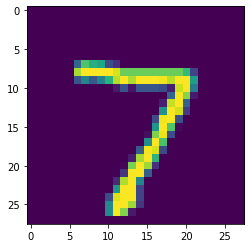

<class 'numpy.ndarray'>
(28, 28)
(10000, 28, 28)


In [38]:
import matplotlib.pyplot as plt
predictions = model.predict(test_data)
# np.set_printoptions(suppress = True)
print(test_labels[0:20])
print(np.argmax(predictions[0]))
plt.imshow(test_data[0])
plt.show()
print(type(test_data[0]))
print(test_data[0].shape)
print(test_data.shape)

In [161]:
import pygame
done = False

BLACK = (0,0,0)
WHITE = (255, 255, 255)
isPressed = False

screen = pygame.display.set_mode((280,280))


screen.fill(WHITE)
def drawCircle(screen,x,y):
  pygame.draw.circle(screen,BLACK,(x,y),10)


done = False
while done == False:

    for event in pygame.event.get():
        if event.type == pygame.QUIT:  # If user clicked close
            done = True  # Flag that we are done so we exit this loop
        if event.type == pygame.MOUSEBUTTONDOWN:
            isPressed = True
        elif event.type == pygame.MOUSEBUTTONUP:
            isPressed = False
        if event.type == pygame.MOUSEMOTION and isPressed == True:
            (x,y) = pygame.mouse.get_pos()
            drawCircle(screen,x,y)
        pygame.display.flip()
        
pygame.image.save(screen, "screenshot.jpg")

pygame.quit()

img = cv.imread("screenshot.jpg",0)
# cv.imshow("screenshot.jpg", img)
# cv.waitKey(0)
cv.destroyAllWindows()
img2 = abs((img / 255.0) -1)
img2 = cv.resize(img2, (28,28), cv.INTER_AREA)
img2 = img2.reshape(1,28,28)
predictionn = model.predict([img2])

print(np.argmax(predictionn[0]))


2
